# MatSE 410 binary pycalphad examples

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/phasesresearchlab/psu-matse410/master?urlpath=lab)


<img src="../_assets/pycalphad-logo-withtext.png" width=200></img>


**pycalphad** is a free and open source software written in Python for performing thermodynamic calculations within the CALculation of PHAse Diagrams (CALPHAD) method.


This guide was contributed to by

- Brandon Bocklund (2019, 2020)

## Outline
1. [CALPHAD](#CALPHAD)
2. [Installation/Binder](#Installation)
3. [Introduction to pycalphad](#Introduction-to-pycalphad)
4. [Binary systems](#Binary-systems)


## Installation

Installation steps are covered by the unary tutorial. If you installed in the unary example, you don't have to do anything new.

If you were unable to install or no longer have your installation available, we have published this repository of code and examples to Binder, so you can run it:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/phasesresearchlab/psu-matse410/master?urlpath=lab)


### Databases

Any calculation in pycalphad requires you to define:

* A Database
* The components to consider
* The phases to consider
* The conditions of the calculation

CALPHAD database files are made by researchers who model the Gibbs energy functions. The parameters (Gibbs energy functions) in the databases are stored in the Thermo-Calc DataBase (TDB) format. Files are usually saved with the file extension `.tdb`. These files are read by pycalphad by importing the `Database` class and running the following

```python
from pycalphad import Database
db = Database("path/to/database.tdb")
```

Many database files have been indexed at the [TDBDB](https://avdwgroup.engin.brown.edu), which can be used to search for TDB files. Many binary and ternary systems have been evaluated, some more than once as new data or calculations are published.

The databases required for these examples are included here.

## Ternary systems

### `eqplot`

Previously we plotted binary phase diagrams with pycalphad's `binplot` function. Here we will use the `eqplot` function as imported above.

`eqplot` take the output from an `equilibrium` calculation to produce phase diagrams.

* `eqplot` is more better than `binplot` because it can calculate more flexible types of diagrams like regular T-X binary phase diagrams, but also T-μ binary phase diagrams. It can also calculate X-X and μ-μ isothermal ternary phase diagrams
* `eqplot` requires that a grid of calculations is performed (e.g. all temperature and compositions in a binary system) and for this reason it is slower than `binplot` at the price of flexibility

### Bi-Pb-Sn

Bi-Pb-Sn are all low melting point eutectic systems that are commercially important for soldiers. These and other soldier elements are defined in the `solders.tdb` file in this `ternary/` folder.

Let's look at the binary subsystems and use `eqplot` to calculate them

In [1]:
from pycalphad import Database, equilibrium, variables as v
from eqplot_helper import eqplot

In [2]:
dbf = Database('solders.tdb')

In [3]:
phases = ['LIQUID', 'FCC_A1', 'HCP_A3', 'BCT_A5', 'RHOMBO_A7']

#### Constituent binary systems

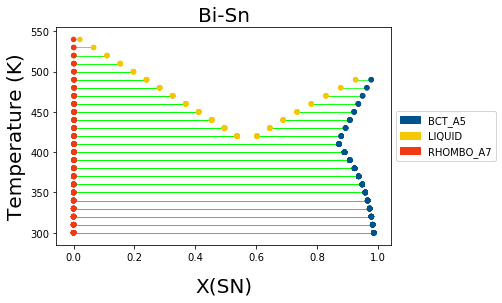

In [4]:
conds = {v.N: 1, v.P: 101325, v.T: (300, 600, 10), v.X('SN'): (0.01, 1, 0.04)}
eq_result = equilibrium(dbf, ['BI', 'SN', 'VA'], phases, conds)
eqplot(eq_result, x=v.X('SN'), y=v.T)

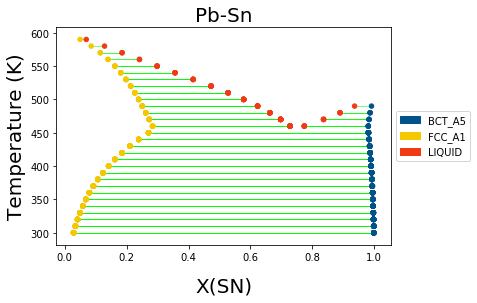

In [5]:
conds = {v.N: 1, v.P: 101325, v.T: (300, 600, 10), v.X('SN'): (0.01, 1, 0.04)}
eq_result = equilibrium(dbf, ['PB', 'SN', 'VA'], phases, conds)
eqplot(eq_result, x=v.X('SN'), y=v.T)

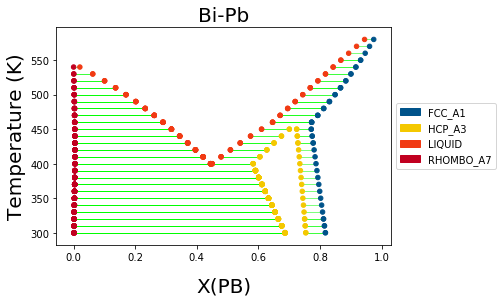

In [6]:
conds = {v.N: 1, v.P: 101325, v.T: (300, 600, 10), v.X('PB'): (0.01, 1, 0.04)}
eq_result = equilibrium(dbf, ['BI', 'PB', 'VA'], phases, conds)
eqplot(eq_result, x=v.X('PB'), y=v.T)

`eqplot` can be used to plot the chemical potential vs. temperature diagram

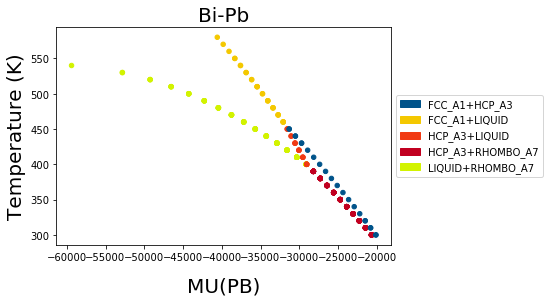

In [7]:
eqplot(eq_result, x=v.MU('PB'), y=v.T)

#### Isotherm at T=430 K

We'll calculate an isotherm using `equilibrium` calculations at T=430 and `eqplot` to plot the phase diagrams with respect to mole fractions and chemical potentials

CPU times: user 29.3 s, sys: 959 ms, total: 30.3 s
Wall time: 30.4 s


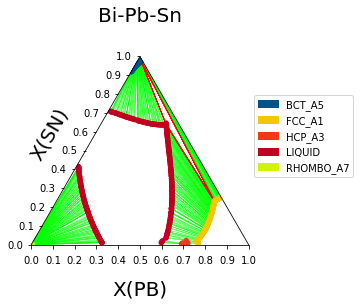

In [8]:
conds = {v.N: 1, v.P: 101325, v.T: 445, v.X('PB'): (0.01, 1, 0.025),  v.X('SN'): (0.01, 1, 0.025)}
%time eq_result = equilibrium(dbf, ['BI', 'PB', 'SN', 'VA'], phases, conds)
eqplot(eq_result, x=v.X('PB'), y=v.X('SN'))

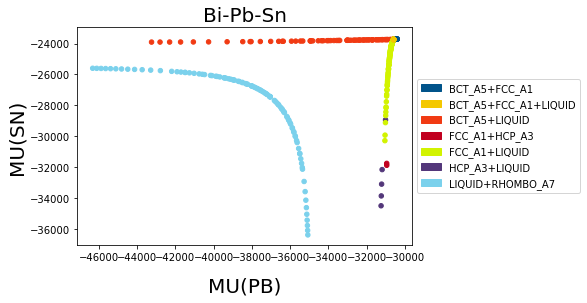

In [9]:
eqplot(eq_result, x=v.MU('PB'), y=v.MU('SN'))